<a href="https://colab.research.google.com/github/Zeeshan506/developerhub-task-3-heart-disease-pridiction/blob/main/Task_3_Heart_Disease_Prediction_%7C_DeveloperHub_Internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 3: Heart Disease Prediction**

---



## Installing and importing libraries

In [3]:
# installing ucimlrepo, since fetching data set in more easier then uploading files.
!pip install ucimlrepo

In [5]:
from ucimlrepo import fetch_ucirepo

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix

## Importing the dataset
Fetching the Dataset from [UC Irvine ML Repository](https://archive.ics.uci.edu/dataset/45/heart+disease)

In [58]:
heart_disease = fetch_ucirepo(id=45)
df = heart_disease.data.features
y = heart_disease.data.targets
df['num'] = y['num']


## Preprocessing The Dataset

In [18]:
df.head() # first five rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [20]:
print(f"No of Rows {df.shape[0]}")
print(f"No of Columns {df.shape[1]}")

No of Rows 303
No of Columns 14


In [21]:
col_names = list(df.columns)
for i in col_names: #all column names
  print(i)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
num


In [22]:
df.describe() # statistical overview of the dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [27]:
print(df.info()) # column types and non-null counts
print("\n Null Value Count \n",df.isnull().sum().sum()) # number of null or missing values
print("\n Dupliacte Count \n",df.duplicated().sum()) # number of duplicated values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB
None

 Null Value Count 
 6

 Dupliacte Count 
 0


## Dataset Visualization
      1. Histplot for variation of data, finding continues and non continues features
      2. Box Plot for


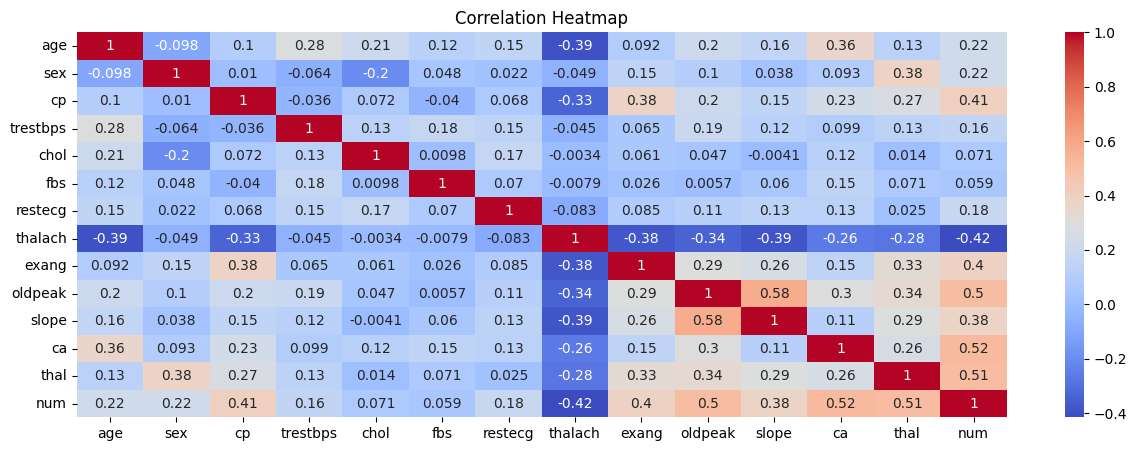

In [33]:
plt.figure(figsize=(15, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Text(0.5, 1.0, 'TrestBPs Histogram')

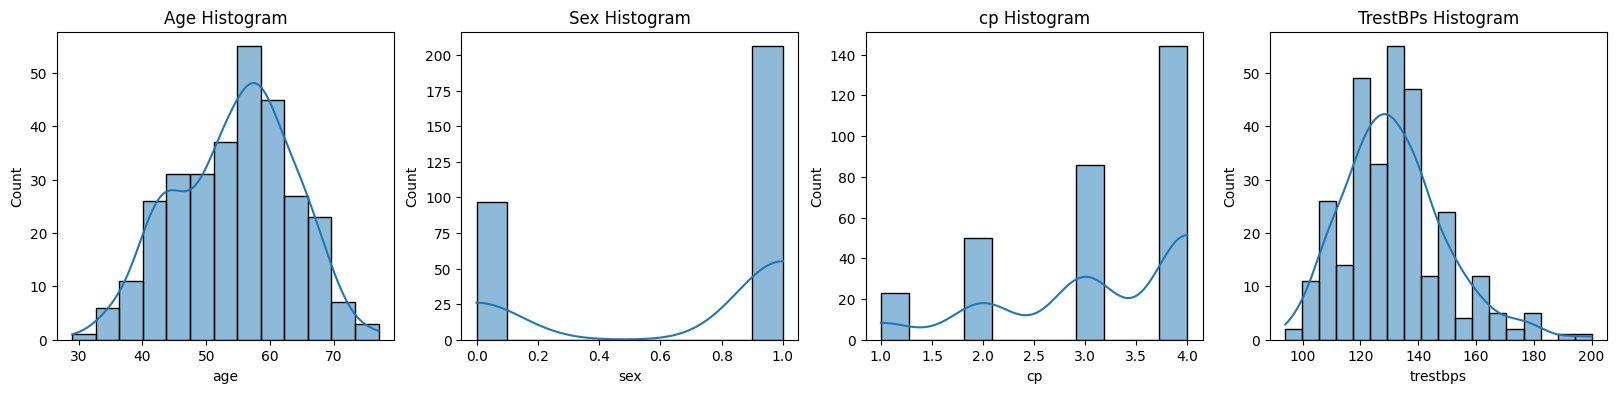

In [37]:
fig, axes = plt.subplots(1,4,figsize=(20, 4))
sns.histplot(data = df, x="age" ,kde=True, ax=axes[0])
axes[0].set_title("Age Histogram")

sns.histplot(data = df, x="sex" ,kde=True, ax=axes[1])
axes[1].set_title("Sex Histogram")

sns.histplot(data = df, x="cp" ,kde=True, ax=axes[2])
axes[2].set_title("cp Histogram")

sns.histplot(data = df, x="trestbps" ,kde=True, ax=axes[3])
axes[3].set_title("TrestBPs Histogram")


Text(0.5, 1.0, 'Target Histogram')

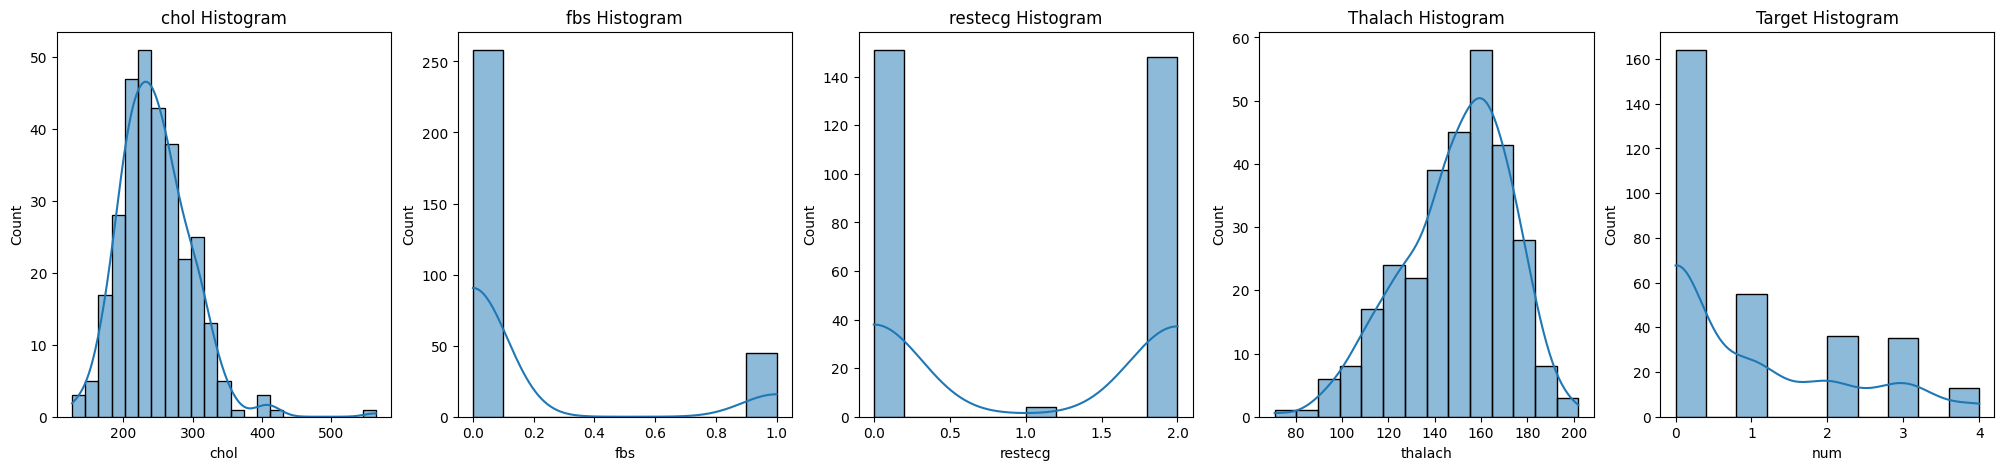

In [41]:
fig, axes = plt.subplots(1,5,figsize=(25, 5))
sns.histplot(data = df, x="chol" ,kde=True, ax=axes[0])
axes[0].set_title("chol Histogram")

sns.histplot(data = df, x="fbs" ,kde=True, ax=axes[1])
axes[1].set_title("fbs Histogram")

sns.histplot(data = df, x="restecg" ,kde=True, ax=axes[2])
axes[2].set_title("restecg Histogram")

sns.histplot(data = df, x="thalach" ,kde=True, ax=axes[3])
axes[3].set_title("Thalach Histogram")

sns.histplot(data = df, x="num" ,kde=True, ax=axes[4])
axes[4].set_title("Target Histogram")

Text(0.5, 1.0, 'thal Histogram')

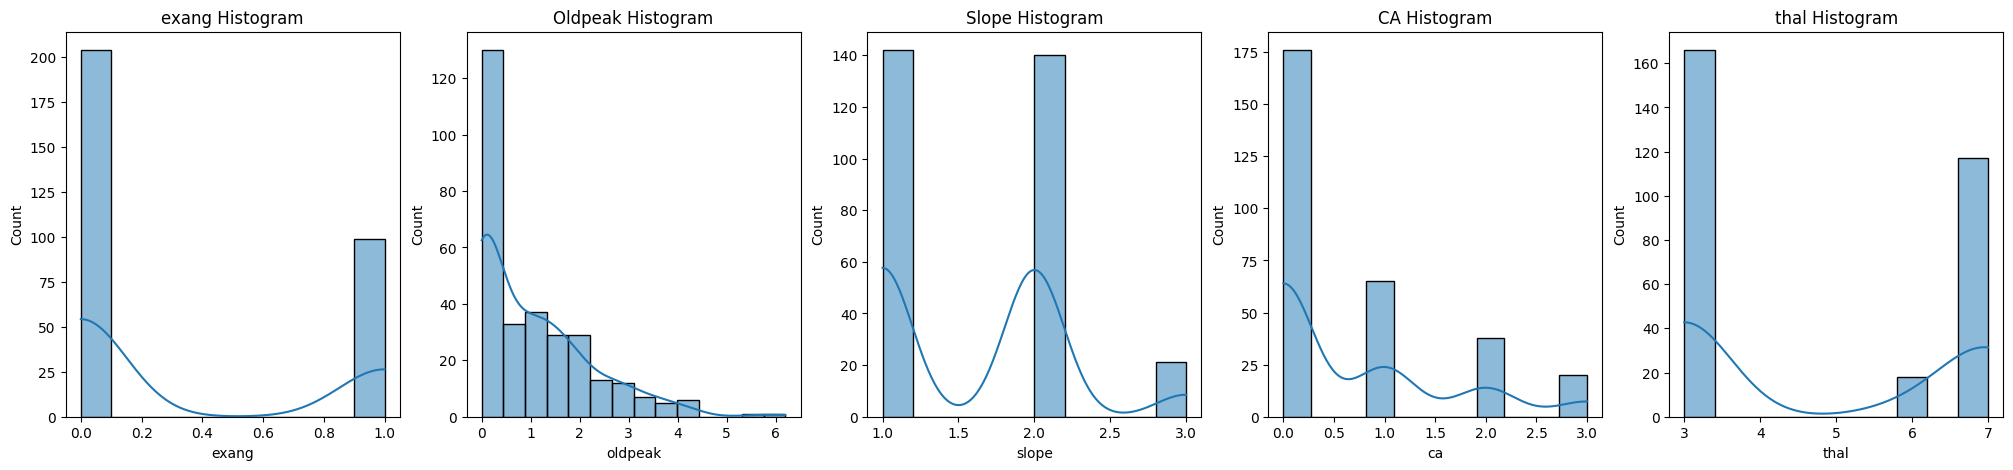

In [39]:
fig, axes = plt.subplots(1,5,figsize=(25,5))
sns.histplot(data = df, x="exang" ,kde=True, ax=axes[0])
axes[0].set_title("exang Histogram")

sns.histplot(data = df, x="oldpeak" ,kde=True, ax=axes[1])
axes[1].set_title("Oldpeak Histogram")

sns.histplot(data = df, x="slope" ,kde=True, ax=axes[2])
axes[2].set_title("Slope Histogram")

sns.histplot(data = df, x="ca" ,kde=True, ax=axes[3])
axes[3].set_title("CA Histogram")

sns.histplot(data = df, x="thal" ,kde=True, ax=axes[4])
axes[4].set_title("thal Histogram")

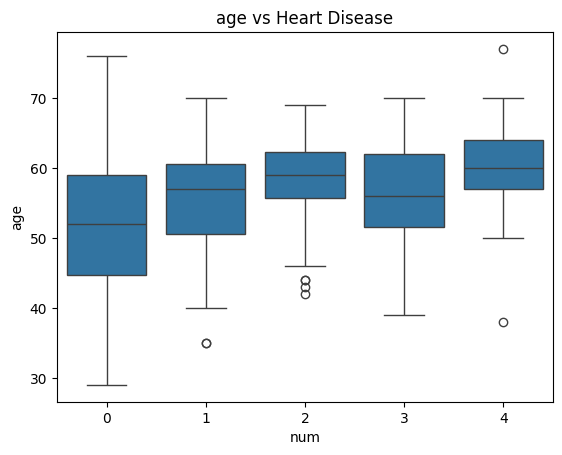

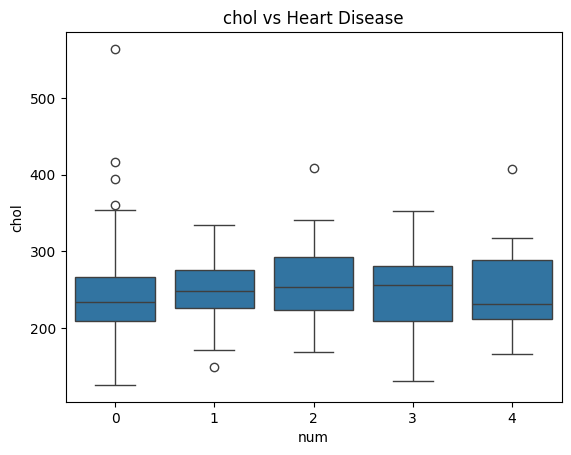

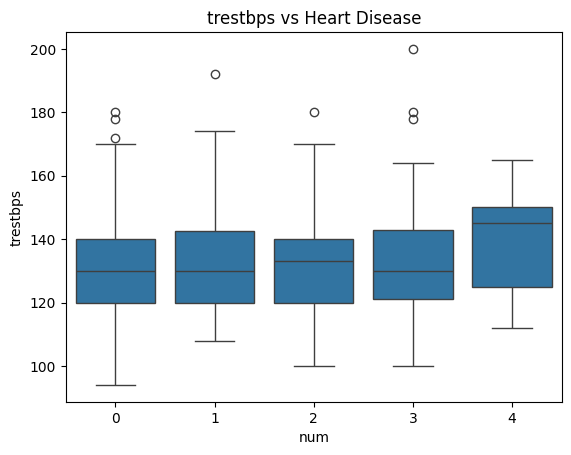

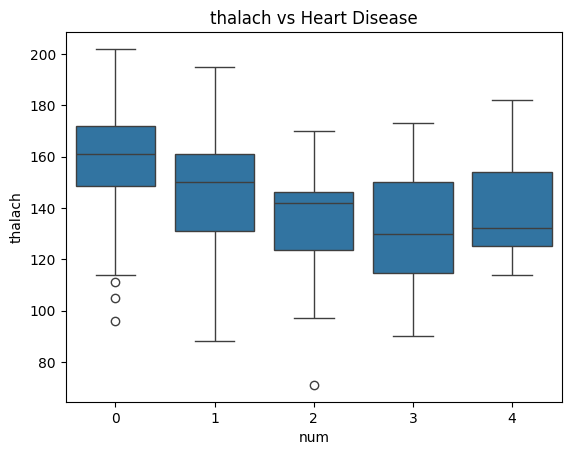

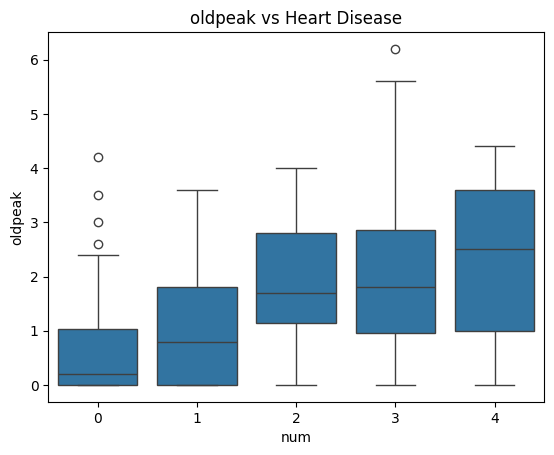

In [45]:
num_features = ['age', 'chol', 'trestbps', 'thalach', 'oldpeak']
fig, axes = plt.subplots(1,5,figsize=(25,5))

for col in num_features:
  sns.boxplot(data = df, x="num",y= col, ax=axes[1])
  axes[1].set_title("Oldpeak Histogram")

    sns.boxplot(x='num', y=col, data=df)
    plt.title(f'{col} vs Heart Disease')
    plt.show()

## Preparing Dataset for Training

In [64]:
X = df.drop('num', axis=1)
y = df['num']

# 1. Drop NaNs from full data (features + target)
combined = pd.concat([X, y], axis=1)
combined = combined.dropna()

# 2. Split again properly
X = combined.drop('num', axis=1)
y = combined['num']

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Scale only numeric features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Scaling
        we perform scaling to scale all the data into something around a standard

In [65]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Training The Model

In [66]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

## Model Accuracy

In [69]:
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6


## Confusion Matrix

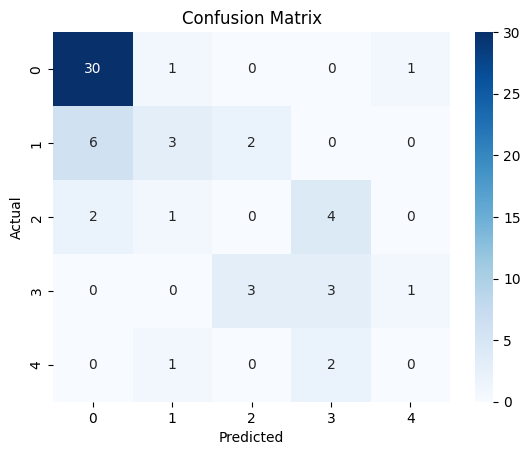

In [70]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Feature Importance

     Feature  Importance
11        ca    0.958461
12      thal    0.738613
2         cp    0.507960
1        sex    0.484582
9    oldpeak    0.444296
3   trestbps    0.420218
8      exang    0.372644
10     slope    0.352973
5        fbs    0.331039
6    restecg    0.303674
4       chol    0.222538
7    thalach    0.206903
0        age    0.036914


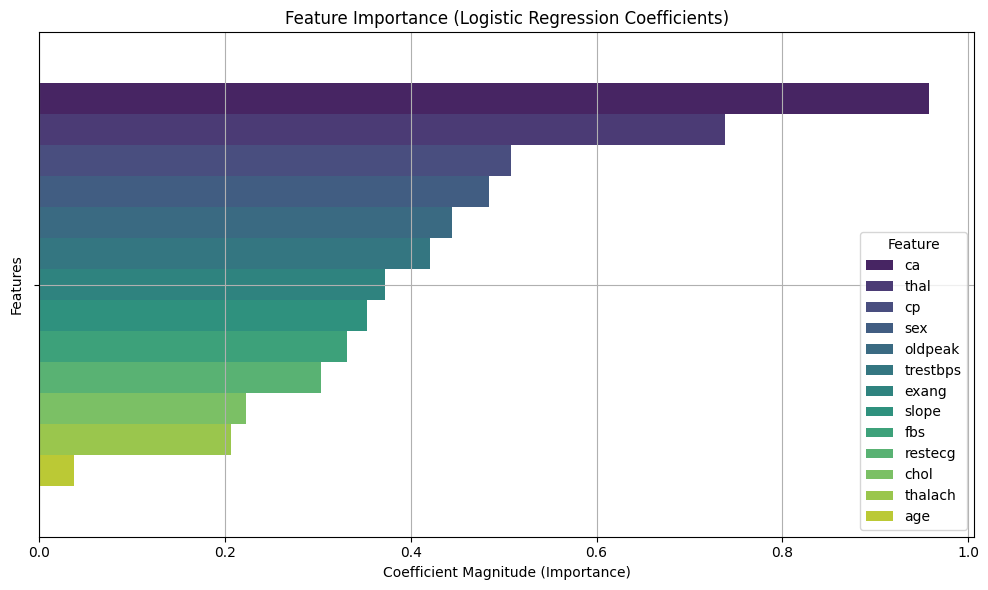

In [78]:
feature_names = X.columns
coefficients = model.coef_[0]  # model.coef_ is a 2D array

# Create a DataFrame for better visualization
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(coefficients)  # Absolute value for magnitude
}).sort_values(by='Importance', ascending=False)

print(feature_importance)


plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', hue="Feature" ,palette='viridis')
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Coefficient Magnitude (Importance)")
plt.ylabel("Features")
plt.grid(True)
plt.tight_layout()
plt.show()

## ROC Curve

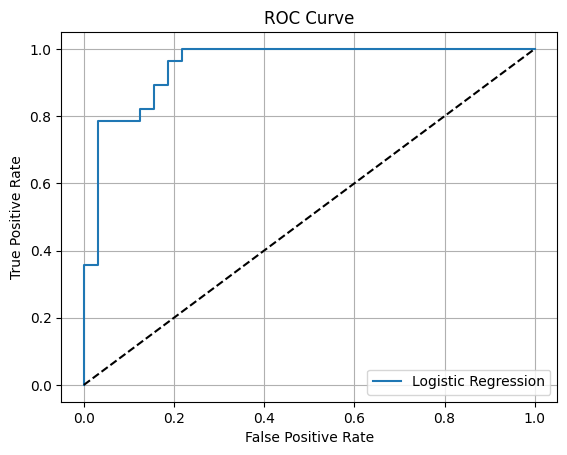

In [74]:
heart_disease = fetch_ucirepo(id=45)
df = heart_disease.data.features
y = heart_disease.data.targets
df['num'] = y['num']


# Convert target to binary: 0 = no disease, 1 = disease present
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Reassign features and labels
X = df.drop('num', axis=1)
y = df['num']

# Drop any remaining NaNs
X = X.dropna()
y = y[X.index]  # Ensure y matches X rows after dropna()

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict probabilities for ROC
y_probs = model.predict_proba(X_test_scaled)[:, 1]

# Plot ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


## Summary
            This notebook presents a complete pipeline for predicting heart disease using logistic regression, as part of the
            DeveloperHub Internship. The dataset is fetched directly from the UCI Machine Learning Repository using the
            ucimlrepo library. After initial exploration and visualization (including histograms, boxplots, and a correlation
            heatmap), the data is cleaned by removing missing values and duplicates. Key features are scaled using StandardScaler,
            followed by model training with logistic regression. Model performance is evaluated using accuracy, a
            confusion matrix, and ROC curve analysis. Additionally, feature importance is analyzed based on logistic regression
            coefficients to identify which variables most influence the prediction.